# Healthcare Data Challenge - Analysis
- Program Created by Alec Gilfillan
- 8/16/2021

In [2]:
# Import packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from pandasql import sqldf

In [3]:
pysqldf = lambda q: sqldf(q, globals())

In [4]:
df = pd.read_csv('cleaned_df.csv')

In [5]:
df.head(10)

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,race_indian,race_other,resident_singapore,resident_pr,resident_foreign,date_of_birth,age,amount_by_date,total_admit,total_amount
0,00225710a878eff524a1d13be817e8e2,2014-04-10 00:00:00.000000,2014-04-22 00:00:00.000000,0,0.0,0,0,0.0,0,1,...,0,0,1,0,0,1983-01-16,38,5190.566695,1,5190.566695
1,0029d90eb654699c18001c17efb0f129,2012-11-07 00:00:00.000000,2012-11-20 00:00:00.000000,0,1.0,0,0,0.0,1,0,...,0,0,1,0,0,1943-10-14,77,22601.497872,1,22601.497872
2,0040333abd68527ecb53e1db9073f52e,2013-01-19 00:00:00.000000,2013-01-31 00:00:00.000000,0,1.0,0,0,0.0,0,1,...,1,0,1,0,0,1972-08-26,48,17447.181635,1,17447.181635
3,00473b58e3dc8ae37b3cb34069705083,2014-02-10 00:00:00.000000,2014-02-15 00:00:00.000000,1,0.0,0,0,0.0,0,0,...,0,0,1,0,0,1976-07-23,45,15285.883220,1,15285.883220
4,0078662d1d983dde68ea057c42d5b5cf,2012-04-28 00:00:00.000000,2012-05-10 00:00:00.000000,0,1.0,0,0,0.0,1,0,...,0,0,0,0,1,1942-10-19,78,73477.869010,1,73477.869010
5,0088bbd94c90bbc9158e13465441ebb6,2015-11-05 00:00:00.000000,2015-11-15 00:00:00.000000,0,1.0,0,0,0.0,0,0,...,0,1,0,0,1,1960-10-22,60,26051.592258,1,26051.592258
6,0092d20dd0719e88ecfdd02d5e7ca7b7,2013-01-20 00:00:00.000000,2013-01-31 00:00:00.000000,0,0.0,0,0,0.0,0,0,...,0,0,1,0,0,1947-09-18,73,21498.986758,1,21498.986758
7,01081b8bcb0f9e27b888d23bb35a50dd,2011-02-02 00:00:00.000000,2011-02-12 00:00:00.000000,0,0.0,0,0,0.0,0,0,...,0,0,1,0,0,1948-04-12,73,27512.273964,1,27512.273964
8,010cf28233f50d3857b499a9c208c610,2011-02-03 00:00:00.000000,2011-02-11 00:00:00.000000,0,0.0,0,0,0.0,1,0,...,0,0,1,0,0,1973-05-28,48,25612.364148,1,25612.364148
9,0116c5d9b6c2c2e8758c75e6da86014b,2012-09-01 00:00:00.000000,2012-09-10 00:00:00.000000,1,0.0,0,0,0.0,0,1,...,0,0,1,0,0,1990-12-15,30,15790.597745,1,15790.597745


In [6]:
corr = df.corr()

In [7]:
corr.to_csv('correlations.csv')

In [8]:
grouped_df = df.groupby('patient_id')

In [9]:
first_values = grouped_df.first()

In [10]:
first_values

,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,...,race_indian,race_other,resident_singapore,resident_pr,resident_foreign,date_of_birth,age,amount_by_date,total_admit,total_amount
patient_id,,,,,,,,,,,,,,,,,,,,,
00225710a878eff524a1d13be817e8e2,2014-04-10 00:00:00.000000,2014-04-22 00:00:00.000000,0,0.0,0,0,0.0,0,1,0,...,0,0,1,0,0,1983-01-16,38,5190.566695,1,5190.566695
0029d90eb654699c18001c17efb0f129,2012-11-07 00:00:00.000000,2012-11-20 00:00:00.000000,0,1.0,0,0,0.0,1,0,0,...,0,0,1,0,0,1943-10-14,77,22601.497872,1,22601.497872
0040333abd68527ecb53e1db9073f52e,2013-01-19 00:00:00.000000,2013-01-31 00:00:00.000000,0,1.0,0,0,0.0,0,1,0,...,1,0,1,0,0,1972-08-26,48,17447.181635,1,17447.181635
00473b58e3dc8ae37b3cb34069705083,2014-02-10 00:00:00.000000,2014-02-15 00:00:00.000000,1,0.0,0,0,0.0,0,0,0,...,0,0,1,0,0,1976-07-23,45,15285.883220,1,15285.883220
0078662d1d983dde68ea057c42d5b5cf,2012-04-28 00:00:00.000000,2012-05-10 00:00:00.000000,0,1.0,0,0,0.0,1,0,1,...,0,0,0,0,1,1942-10-19,78,73477.869010,1,73477.869010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffa5a615a4cc5fb1ada0443edc1f5dd3,2011-04-24 00:00:00.000000,2011-05-04 00:00:00.000000,0,1.0,0,0,0.0,0,1,0,...,1,0,1,0,0,1976-08-07,45,4676.066179,1,4676.066179
ffac3c4b6838f42625e1dd00dd7c867b,2015-11-28 00:00:00.000000,2015-12-07 00:00:00.000000,0,0.0,0,0,0.0,0,0,1,...,0,0,1,0,0,1963-10-07,57,14049.042774,1,14049.042774
ffc19537fa6621512ef4f296d60896ce,2013-05-05 00:00:00.000000,2013-05-15 00:00:00.000000,0,1.0,0,0,1.0,0,0,1,...,0,0,0,1,0,1938-09-12,82,30053.620971,1,30053.620971


In [11]:
first_values = first_values.reset_index()

In [12]:
first_values

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,race_indian,race_other,resident_singapore,resident_pr,resident_foreign,date_of_birth,age,amount_by_date,total_admit,total_amount
0,00225710a878eff524a1d13be817e8e2,2014-04-10 00:00:00.000000,2014-04-22 00:00:00.000000,0,0.0,0,0,0.0,0,1,...,0,0,1,0,0,1983-01-16,38,5190.566695,1,5190.566695
1,0029d90eb654699c18001c17efb0f129,2012-11-07 00:00:00.000000,2012-11-20 00:00:00.000000,0,1.0,0,0,0.0,1,0,...,0,0,1,0,0,1943-10-14,77,22601.497872,1,22601.497872
2,0040333abd68527ecb53e1db9073f52e,2013-01-19 00:00:00.000000,2013-01-31 00:00:00.000000,0,1.0,0,0,0.0,0,1,...,1,0,1,0,0,1972-08-26,48,17447.181635,1,17447.181635
3,00473b58e3dc8ae37b3cb34069705083,2014-02-10 00:00:00.000000,2014-02-15 00:00:00.000000,1,0.0,0,0,0.0,0,0,...,0,0,1,0,0,1976-07-23,45,15285.883220,1,15285.883220
4,0078662d1d983dde68ea057c42d5b5cf,2012-04-28 00:00:00.000000,2012-05-10 00:00:00.000000,0,1.0,0,0,0.0,1,0,...,0,0,0,0,1,1942-10-19,78,73477.869010,1,73477.869010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,ffa5a615a4cc5fb1ada0443edc1f5dd3,2011-04-24 00:00:00.000000,2011-05-04 00:00:00.000000,0,1.0,0,0,0.0,0,1,...,1,0,1,0,0,1976-08-07,45,4676.066179,1,4676.066179
2996,ffac3c4b6838f42625e1dd00dd7c867b,2015-11-28 00:00:00.000000,2015-12-07 00:00:00.000000,0,0.0,0,0,0.0,0,0,...,0,0,1,0,0,1963-10-07,57,14049.042774,1,14049.042774
2997,ffc19537fa6621512ef4f296d60896ce,2013-05-05 00:00:00.000000,2013-05-15 00:00:00.000000,0,1.0,0,0,1.0,0,0,...,0,0,0,1,0,1938-09-12,82,30053.620971,1,30053.620971
2998,ffd67c2bcfb32508d2cf7b1e1193e2ed,2012-12-24 00:00:00.000000,2013-01-01 00:00:00.000000,0,0.0,0,0,0.0,0,0,...,0,0,1,0,0,1950-06-06,71,28007.636468,1,28007.636468


In [13]:
first_values['amount_by_date'].describe()

count     3000.000000
mean     21795.879140
std      10163.184269
min       2946.100354
25%      14658.001747
50%      20101.522184
75%      26733.192619
max      98120.870207
Name: amount_by_date, dtype: float64

In [14]:
bin_values = np.arange(start=2900, stop=100000, step=1000)

<AxesSubplot:>

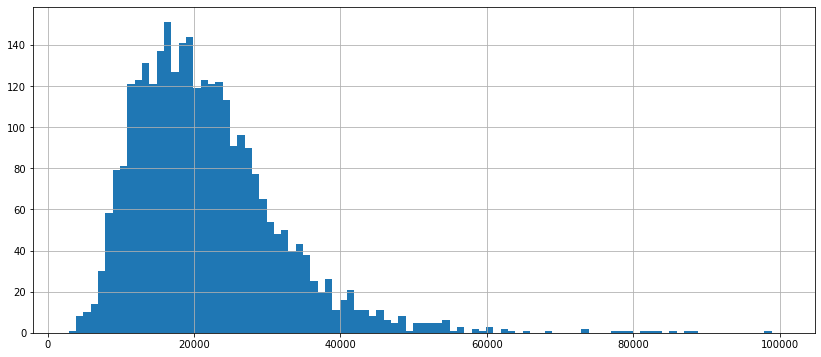

In [15]:
first_values['amount_by_date'].hist(bins=bin_values, figsize=[14,6])

In [16]:
first_values['amount_log'] = np.log(first_values['amount_by_date'])

In [17]:
first_values['amount_log'].describe()

count    3000.000000
mean        9.890227
std         0.449133
min         7.988238
25%         9.592742
50%         9.908551
75%        10.193661
max        11.493955
Name: amount_log, dtype: float64

In [18]:
bin_values = np.arange(start=7, stop=12, step=0.1)

<AxesSubplot:>

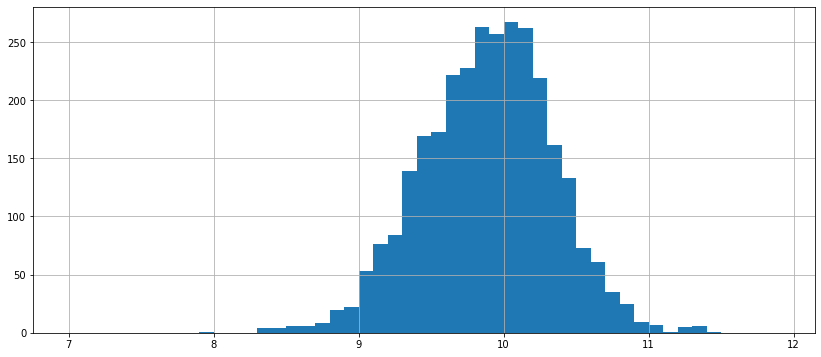

In [19]:
first_values['amount_log'].hist(bins=bin_values, figsize=[14,6])

In [20]:
x=first_values[['age','female','medical_history_1' ,'preop_medication_2', 'symptom_1','symptom_2','symptom_3',
                'symptom_4', 'symptom_5','weight','race_chinese','race_malay','race_indian', 'resident_singapore',
                'resident_pr']]
y=first_values['amount_by_date']

#medical_history 1
#preop_medication  2 (4) (6)
#symptom 1 2 3 4 5
#lab_result no
#weight yes
#height yes, very close

#race_chinese race_malay race_indian yes to these 
#resident_singapore resident_pr resident_foreign yes to these

In [21]:
import statsmodels.api as sm
x_lm = sm.add_constant(x)

lr_1 = sm.OLS(y, x_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         amount_by_date   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1853.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:41:34   Log-Likelihood:                -28436.
No. Observations:                3000   AIC:                         5.690e+04
Df Residuals:                    2984   BIC:                         5.700e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2724.3176    668.192      4.077      0.000    1414.155    4034.480
age                  203.2314      3.979     51.072      0.000     195.429     211.034
female               234.5243    125.711      1.866      0.062     -11.965     481.014
medical_history_1   5923.0303    156.066     37.952      0.000    5617.022    6229.038
preop_medication_2   288.9879    117.949      2.450      0.014      57.719     520.257
symptom_1           2700.1402    119.474     22.600      0.000    2465.881    2934.399
symptom_2           3564.0386    122.588     29.073      0.000    3323.673    3804.404
symptom_3           3886.8601    116.845     33.265      0.000    3657.755    4115.966
symptom_4           3125.8070    129.505     24.137      0.000    2871.878    3379.736
symptom_5           1.036e+04    116.276     89.086      0.000    1.01e+04    1.06e+04
weight               133.0640      5.721     23.259      0.000     121.846     144.282
race_chinese       -2102.9696    260.835     -8.062      0.000   -2614.405   -1591.534
race_malay          8284.3998    280.622     29.522      0.000    7734.167    8834.632
race_indian         1829.1920    311.563      5.871      0.000    1218.292    2440.092
resident_singapore -2.096e+04    274.041    -76.479      0.000   -2.15e+04   -2.04e+04
resident_pr        -1.692e+04    303.953    -55.665      0.000   -1.75e+04   -1.63e+04
==============================================================================
Omnibus:                     1579.777   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38600.197
Skew:                           1.982   Prob(JB):                         0.00
Kurtosis:                      20.120   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""